# Linear Regression 선형 회귀
데이터의 패턴을 가장 잘 설명하는 선을 찾는 알고리즘. 사용되는 선은 선형, 독립변수와 종속 변수 사이의 관계를 나타냅니다. W는 가중치, b는 절편을 뜻합니다.
* poly regression 다항 회귀
> 선형회귀의 확장판. 데이터의 패턴이 단순한 직선보다는 곡선 형태로 나타나는 경우 사용. 다항회귀는 독립 변수의 거듭 제곱 항을 추가하여 모델의 복잡도를 증가시킴
* regularized regression 정규화 회귀
> 과접합을 방지하기 위해 사용하는 방법 중 하나. 모델이 복잡해지면 소량의 데이터 변화에도 민감하게 반응하여 과적합이 발생할 수 있는데, 이를 방지하기 위해 복잡도에 페널티를 부여하는 방식.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression

### 아이스크림 판매량 예측

In [3]:
temperature = [30,32,34,36]
sale = [10,20,30,40]

<Axes: >

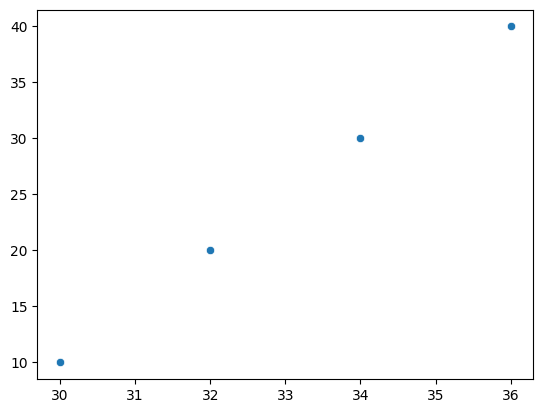

In [4]:
sns.scatterplot(x = temperature, y = sale)

In [5]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

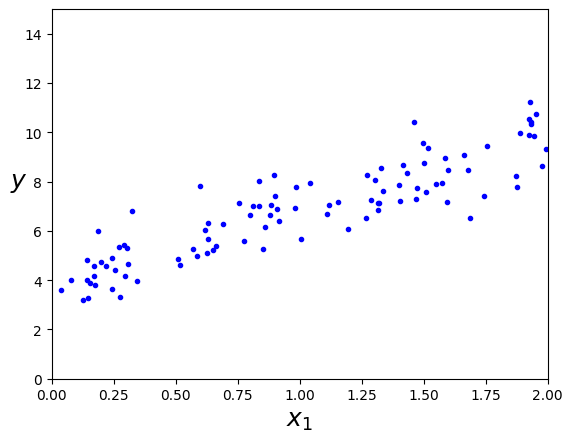

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# 전체 식은 앞서 설명한 선형 회귀의 정규방정식을 구현한 것입니다. 여기서 계산된 theta_best는 최적의 파라미터(가중치와 절편) 값을 포함하게 됩니다.
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[3.89263867],
       [2.93518482]])

In [11]:
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.89263867],
       [9.7630083 ]])

In [12]:
X_new

array([[0],
       [2]])

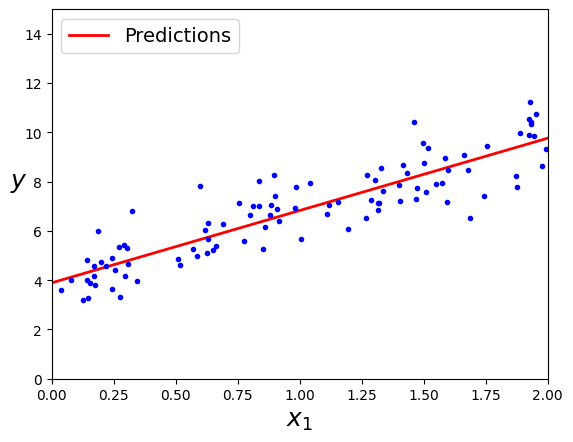

In [14]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
# 학습된 선형 회귀 모델의 절편 값을 반환 / 학습된 선형 회귀 모델의 가중치(계수)값을 반환
lin_reg.intercept_, lin_reg.coef_

(array([3.89263867]), array([[2.93518482]]))

In [17]:
lin_reg.predict(X_new)

array([[3.89263867],
       [9.7630083 ]])

In [18]:
# np.linalg.lstsq: 이 함수는 선형 시스템의 최소 제곱해를 반환
# rcond=1e-6: 특이값을 잘라내기 위한 임계값입니다. 이 값보다 작은 특이값은 0으로 간주
# theta_best_svd: lstsq 함수의 첫 번째 반환값으로, 선형 회귀의 파라미터(가중치와 절편)를 포함하는 배열
# residuals: 잔차의 제곱합입니다. 잔차는 실제 값과 예측 값 사이의 차이
# rank: X_b 행렬의 랭크
# s: X_b 행렬의 특이값
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.89263867],
       [2.93518482]])

# Polynomial Regression(비선형)

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

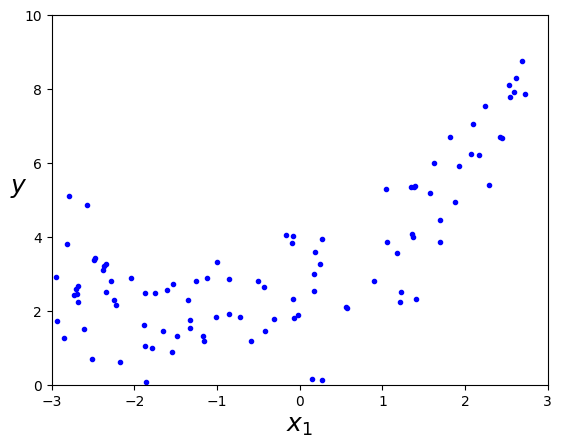

In [20]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.28195542])

In [22]:
X_poly[0]

array([-2.28195542,  5.20732052])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.33652373]), array([[0.9799997, 0.4287109]]))

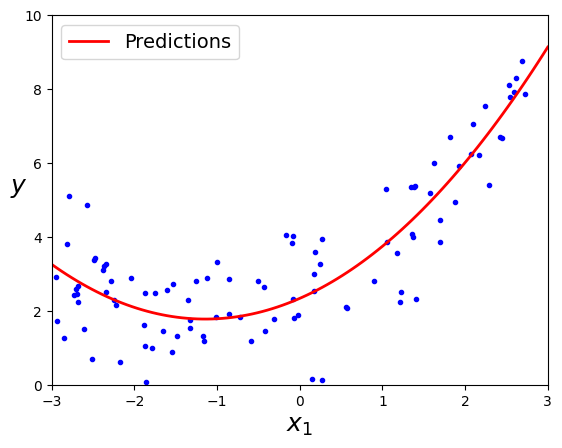

In [24]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()